# Kaggle Spaceshic Titanic
Link: https://www.kaggle.com/competitions/spaceship-titanic/overview

## Importing libraries

In [388]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Load dataset

In [389]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.info())
print('-------------------------------------------------->')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
-------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data column

In [390]:
print(train.isna().sum())
print('-------------------->')
print(test.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
-------------------->
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


### Dropping unnecessary columns

In [391]:
train = train.drop(['Cabin','Name'], axis = 1)
test = test.drop(['Cabin','Name'], axis = 1)

### Fill missing values

In [392]:
imputer1 = SimpleImputer(strategy='constant', fill_value=0)
imputer2 = SimpleImputer(strategy = 'median')
imputer3 = SimpleImputer(strategy = 'most_frequent')

train['Age'] = imputer2.fit_transform(train[['Age']]).astype(int)
test['Age'] = imputer2.fit_transform(test[['Age']]).astype(int)

train['RoomService'] = imputer2.fit_transform(train[['RoomService']])
test['RoomService'] = imputer2.fit_transform(test[['RoomService']])

train['FoodCourt'] = imputer2.fit_transform(train[['FoodCourt']])
test['FoodCourt'] = imputer2.fit_transform(test[['FoodCourt']])

train['ShoppingMall'] = imputer2.fit_transform(train[['ShoppingMall']])
test['ShoppingMall'] = imputer2.fit_transform(test[['ShoppingMall']])

train['Spa'] = imputer2.fit_transform(train[['Spa']])
test['Spa'] = imputer2.fit_transform(test[['Spa']])

train['VRDeck'] = imputer2.fit_transform(train[['VRDeck']])
test['VRDeck'] = imputer2.fit_transform(test[['VRDeck']])

train['VIP'] = imputer1.fit_transform(train[['VIP']]).astype(int)
test['VIP'] = imputer1.fit_transform(test[['VIP']]).astype(int)

train['HomePlanet'] = imputer3.fit_transform(train[['HomePlanet']]).astype(str)
test['HomePlanet'] = imputer3.fit_transform(test[['HomePlanet']]).astype(str)

train['CryoSleep'] = imputer3.fit_transform(train[['CryoSleep']]).astype(int)
test['CryoSleep'] = imputer3.fit_transform(test[['CryoSleep']]).astype(int)

train['Destination'] = imputer3.fit_transform(train[['Destination']]).astype(str)
test['Destination'] = imputer3.fit_transform(test[['Destination']]).astype(str)

train['Transported'] = train[['Transported']].astype(int)

print(train.isna().sum())
print('-------------------->')
print(test.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
-------------------->
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


### Adding new column 'Total Spent'

In [393]:
train['Total Spent'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
test['Total Spent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

# Data visualization

### Target column 'Transported' distribution

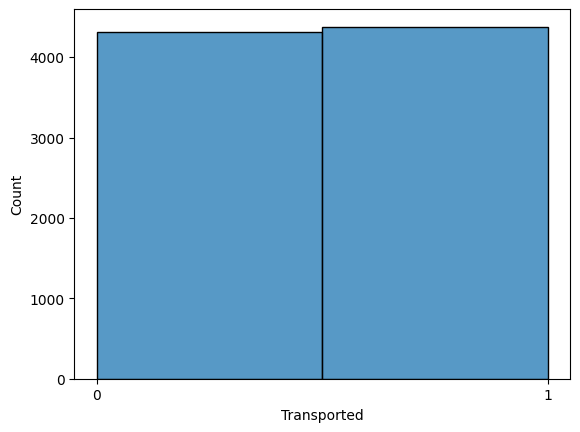

In [394]:
sns.histplot(train['Transported'], bins=2)
plt.xticks(range(0,2))
plt.show()

### HomePlanet 

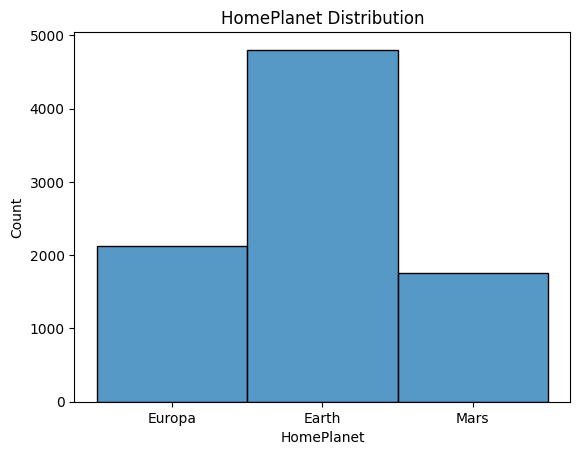

In [395]:
#plt.subplot(1, 2, 1)
sns.histplot(train['HomePlanet'])
plt.title('HomePlanet Distribution')

#plt.subplot(1, 2, 2)

plt.show()

### CryoSleep

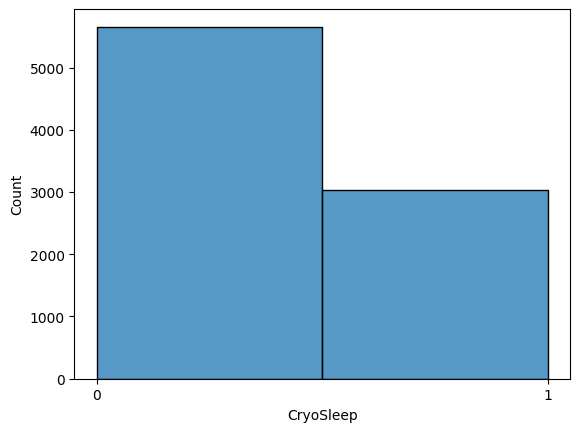

In [396]:
sns.histplot(train['CryoSleep'], bins=2)
plt.xticks(range(0,2))
plt.show()

### Destination

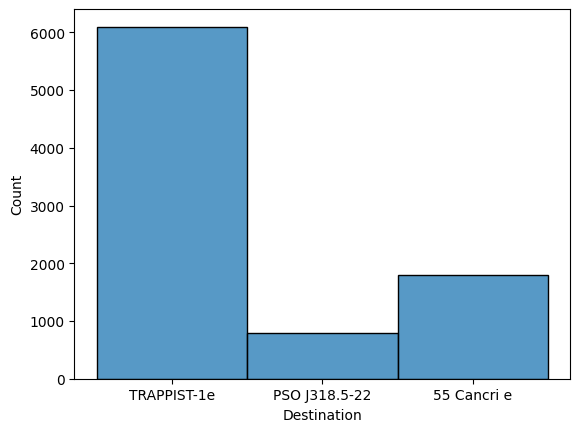

In [397]:
sns.histplot(train['Destination'])
plt.show()

### VIP

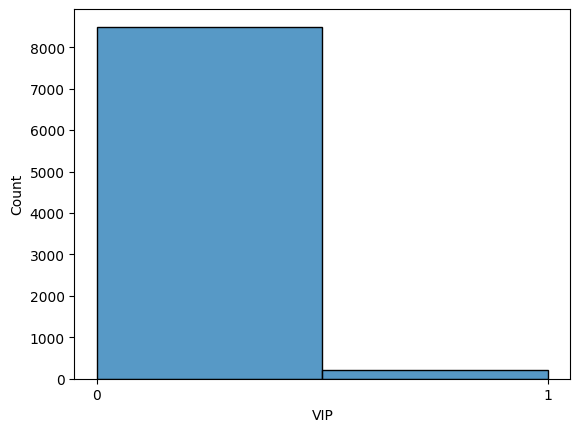

In [398]:
sns.histplot(train['VIP'], bins=2)
plt.xticks(range(0,2))
plt.show()

### Age

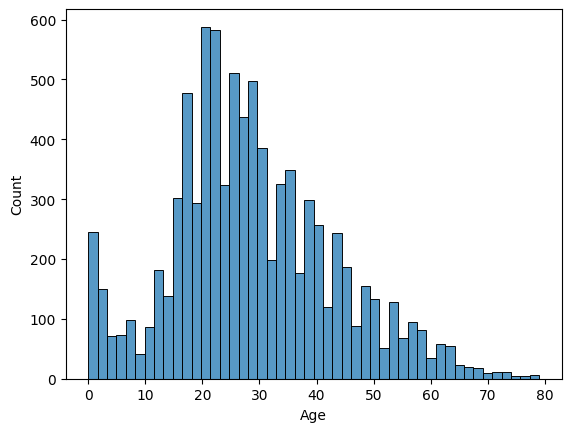

In [399]:
sns.histplot(train['Age'])
plt.show()

### Distribution of total spending on deck

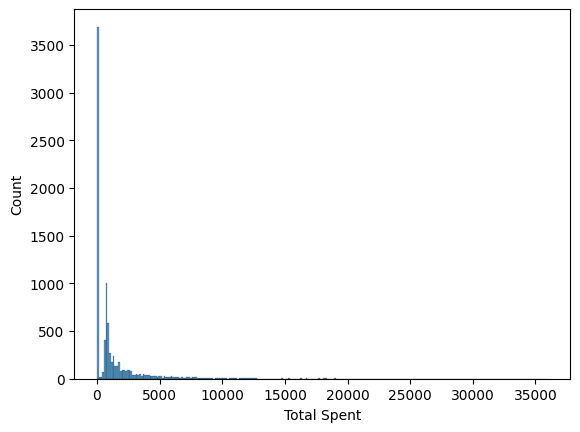

In [400]:
sns.histplot(train['Total Spent'])
plt.show()

### Transform categorical data

In [401]:
label_enc = LabelEncoder()

train['HomePlanet'] = label_enc.fit_transform(train['HomePlanet'])
train['Destination'] = label_enc.fit_transform(train['Destination'])

test['HomePlanet'] = label_enc.fit_transform(test['HomePlanet'])
test['Destination'] = label_enc.fit_transform(test['Destination'])

### Standardize numerical columns

In [402]:
scaler = StandardScaler()

train['Age'] = scaler.fit_transform(train[['Age']])
test['Age'] = scaler.fit_transform(test[['Age']])

train['RoomService'] = scaler.fit_transform(train[['RoomService']])
test['RoomService'] = scaler.fit_transform(test[['RoomService']])

train['FoodCourt'] = scaler.fit_transform(train[['FoodCourt']])
test['FoodCourt'] = scaler.fit_transform(test[['FoodCourt']])

train['ShoppingMall'] = scaler.fit_transform(train[['ShoppingMall']])
test['ShoppingMall'] = scaler.fit_transform(test[['ShoppingMall']])

train['Spa'] = scaler.fit_transform(train[['Spa']])
test['Spa'] = scaler.fit_transform(test[['Spa']])

train['VRDeck'] = scaler.fit_transform(train[['VRDeck']])
test['VRDeck'] = scaler.fit_transform(test[['VRDeck']])

train['Total Spent'] = scaler.fit_transform(train[['Total Spent']])
test['Total Spent'] = scaler.fit_transform(test[['Total Spent']])

### Correlation matrix

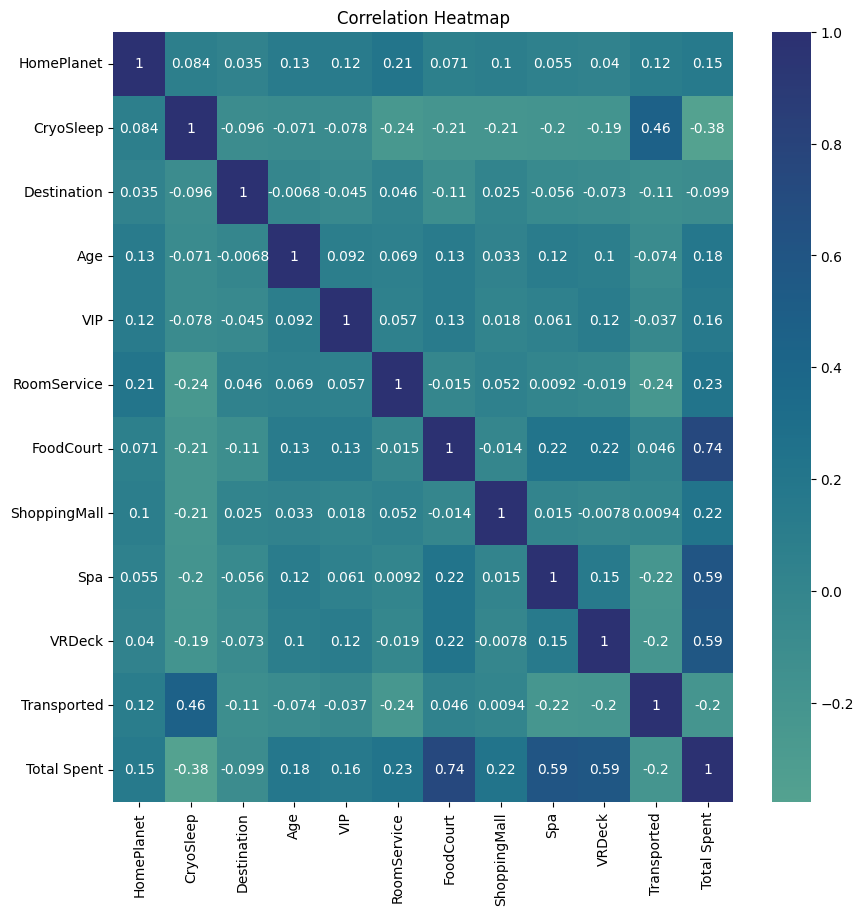

In [403]:
corre = train.corr(numeric_only = True)
                  
plt.figure(figsize=(10, 10))

sns.heatmap(corre, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap')
plt.show()

## ML Prediction

### Logistic Regression Model

In [404]:
features = ['CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target = ['Transported']

lr_model = LogisticRegression()

X = train[features]
y = train[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

lr_model.fit(X_train, y_train)
y_predicted = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Model Accuracy Score: {round(accuracy * 100, 1)}%')

Model Accuracy Score: 77.5%


### DecisionTreeClassifier Model

In [405]:
dtc_model = DecisionTreeClassifier()

dtc_model.fit(X_train, y_train)
y_predicted = dtc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Model Accuracy Score: {round(accuracy * 100, 1)}%')

Model Accuracy Score: 72.3%


### RandomForestClassifier Model

In [406]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 12, random_state=42)
rf_model.fit(X_train, y_train)
y_predicted = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Model Accuracy Score: {round(accuracy * 100, 1)}%')

Model Accuracy Score: 77.9%


### SVC Model

In [415]:
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)
y_predicted = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Model Accuracy Score: {round(accuracy * 100, 1)}%')

Model Accuracy Score: 78.3%


### Submission file

In [414]:
test['Transported'] = svc_model.predict(test[features])

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': test['Transported']})
output['Transported'] = output['Transported'].astype(bool)
output.to_csv('submission.csv',index=False)